## Model Tuning for the Top 2 models
- nn
- lr

#### Things to take note:
1. outliers
2. features selection
    - Correlation 
    - Select K-best
    - Feature importance
3. features extraction  
    - PCA
4. GridSearchCV

In [1]:
print('testing')

testing


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from preprocess import Preprocess
clean = Preprocess()


In [3]:
df = pd.read_csv('mobile_dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [50]:
df[df['price_range']==3]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,three_g,touch_screen,wifi,price_range
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,1,0,1,3
10,769,1,2.9,1,0,0,9,0.1,182,5,1,248,874,3946,5,2,0,0,0,3
11,1520,1,2.2,0,5,1,33,0.5,177,8,18,151,1005,3826,14,9,1,1,1,3
16,838,0,0.5,0,1,1,13,0.1,196,8,4,984,1850,3554,10,9,1,0,1,3
17,595,0,0.9,1,7,1,23,0.1,121,3,17,441,810,3752,10,2,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,1882,0,2.0,0,11,1,44,0.8,113,8,19,4,743,3579,19,8,1,1,0,3
1993,1467,1,0.5,0,0,0,18,0.6,122,5,0,888,1099,3962,15,11,1,1,1,3
1994,858,0,2.2,0,1,0,50,0.1,84,1,2,528,1416,3978,17,16,1,1,0,3
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,1,1,0,3


In [5]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [6]:
df['n_cores'].unique()

array([2, 3, 5, 6, 1, 8, 4, 7], dtype=int64)

In [7]:
df.describe()
df.drop(columns=['talk_time'],inplace=True)

In [8]:
X = df.drop(columns=['price_range'])
y = df['price_range']

print(X.shape)
print(y.shape)

X_train,X_test,y_train,y_test = clean.Split(X,y,test_size=0.25)

(2000, 19)
(2000,)


{'sc_h', 'fc', 'four_g', 'px_height'}


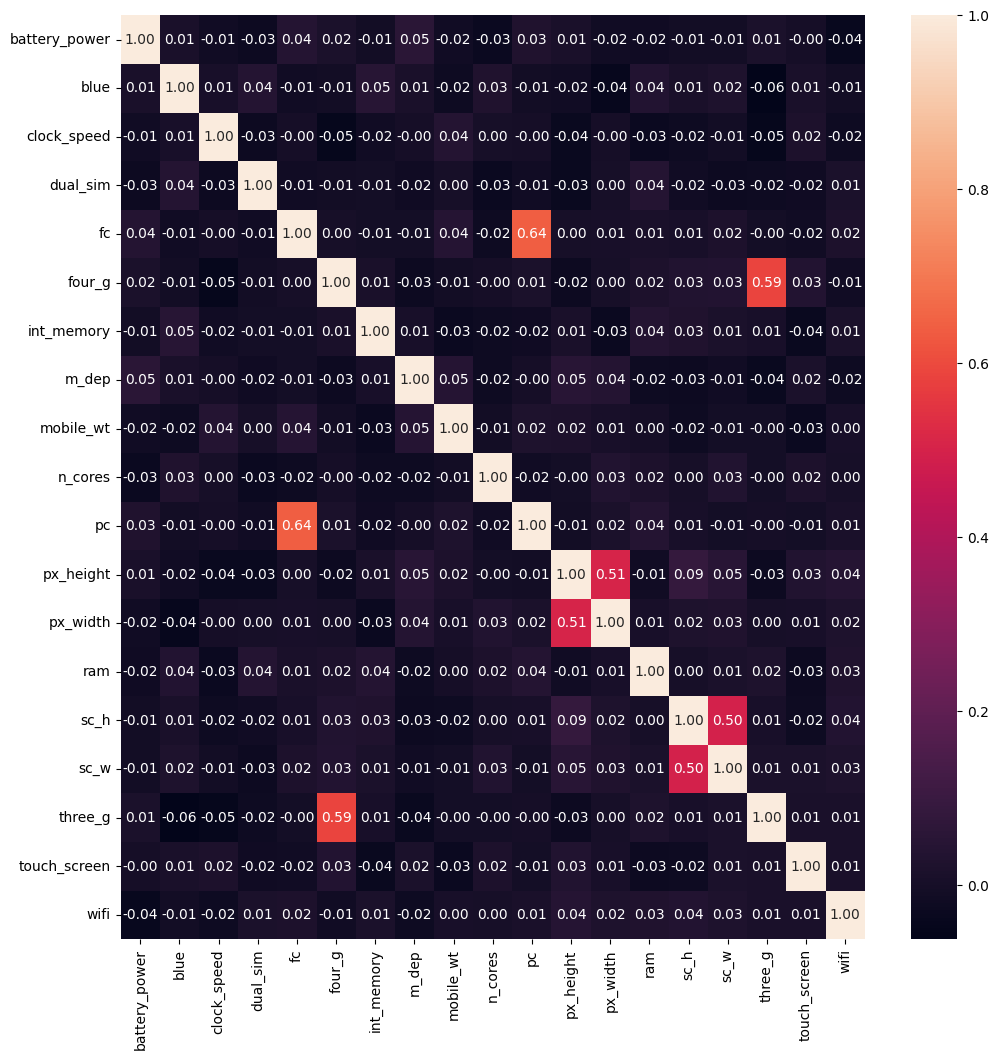

In [9]:
# Checking collinearity
def check_collinearity(df,threshold):
    corr = df.corr()
    f,ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr,annot=True,ax=ax,fmt='.2f')

    highly_correlated = np.where(np.abs(corr)>=threshold)

    correlated_features = set()
    for i,j in zip(*highly_correlated):
        if i!=j and i<j:
            correlated_features.add(corr.columns[i])

    print(correlated_features)

    return correlated_features

redundant = check_collinearity(X_train,0.49)

In [10]:
## investigate the redundant columns

# 4g vg 3g
# phone -> if it don even have 3g, means 4g absolutely no
# prove:
print(len(df[(df['four_g']==1)&(df['three_g']==0)])) # no 3g
print(len(df[(df['four_g']==0)&(df['three_g']==0)])) # no 3g and 4g
print(len(df[(df['four_g']==0)&(df['three_g']==1)])) # no 4g
print(len(df[(df['four_g']==1)&(df['three_g']==1)])) # have both
# solution: so when a phone have 3g, then only it is possible to have 4g
#           when the phone no 3g, 4g definitely is 0, 
# therefore, i can combine two columns into one, where: phone_g = 0 (no 3g), 1 (got 3g no 4g), 2 (got both)

# fc vs pc
print(X_train['pc'].unique())
print(X_train['fc'].unique())

print(len(df[(df['pc']==0) & (df['fc']==0)])) #both = 0
print(len(df[(df['pc']==0) & (df['fc']!=0)])) # pc = 0
print(len(df[(df['pc']!=0) & (df['fc']==0)])) # fc = 0
print(len(df[(df['pc']!=0) & (df['fc']!=0)])) # both !=0

# px_height vs px_width 
# there is a row that height or width = 0, the row is removed
print(len(X_train[(X_train['px_height']==0) | (X_train['px_width']==0)]))
# combine them through multiplication to represent total pixels

# sc_h vs sc_w
zeros_percentage = X_train[(X_train['sc_w']==0)].shape[0] / X_train.shape[0] *100
print(zeros_percentage)
# 8.9% of zeros on the sc_w (width), those rows are removed
# combine them through multiplication to represent total area


0
477
480
1043
[16  1 13  4 14  5 19 17 10  0 15  9 12  7  8 11  3 20  2  6 18]
[ 3  0  5  4  2  1  7  6 10  9 13 11  8 15 12 14 16 18 17]
101
0
373
1526
1
8.933333333333334


In [11]:
def clean_3g4g(df):
    conditions = [(df['four_g']==0)&(df['three_g']==0), #no 3g
                  (df['four_g']==0)&(df['three_g']==1), #no 4g
                  (df['four_g']==1)&(df['three_g']==1)  #have both
                 ]

    choices = [0,1,2]
    df['phone_g'] = np.select(conditions, choices, default=0)
    df = df.drop(columns=['four_g','three_g'])

    return df

X_train = clean_3g4g(X_train)
X_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'int_memory',
       'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram',
       'sc_h', 'sc_w', 'touch_screen', 'wifi', 'phone_g'],
      dtype='object')

In [12]:
def fcpc(df):
    df['fcpc'] = df['fc'] + df['pc']
    df = df.drop(columns=['pc','fc'])

    return df

X_train=fcpc(X_train)
print(X_train.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'int_memory',
       'm_dep', 'mobile_wt', 'n_cores', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'touch_screen', 'wifi', 'phone_g', 'fcpc'],
      dtype='object')


In [13]:
def pxhw(df,y):
    valid_indices = (df['px_height'] != 0) & (df['px_width'] != 0)

    df['pxhw'] = df['px_height'] * df['px_width']
    df = df.drop(columns=['px_height','px_width'])
    y = y[valid_indices]

    return df[valid_indices],y

X_train,y_train = pxhw(X_train,y_train)
X_train.head()


,battery_power,blue,clock_speed,dual_sim,int_memory,m_dep,mobile_wt,n_cores,ram,sc_h,sc_w,touch_screen,wifi,phone_g,fcpc,pxhw
947,907,0,1.4,1,42,0.2,151,1,584,11,9,0,0,1,19,86697
1155,1414,1,2.2,1,49,0.5,101,4,2290,13,0,1,0,2,1,115310
446,1991,1,2.7,0,64,0.9,145,2,1733,5,3,1,0,2,18,1401850
240,633,1,2.2,0,49,0.1,139,8,3560,11,1,1,1,2,1,533761
124,1166,0,2.0,0,25,0.8,198,5,2488,13,5,0,0,2,7,70977


In [14]:
def schw(df,y):
    valid_indices = (df['sc_h'] != 0) & (df['sc_w'] != 0)

    df['schw'] = df['sc_h'] *  df['sc_w']
    df = df.drop(columns=['sc_h','sc_w'])

    y = y[valid_indices]

    return df[valid_indices],y
    
X_train,y_train = schw(X_train,y_train)
X_train.head()

,battery_power,blue,clock_speed,dual_sim,int_memory,m_dep,mobile_wt,n_cores,ram,touch_screen,wifi,phone_g,fcpc,pxhw,schw
947,907,0,1.4,1,42,0.2,151,1,584,0,0,1,19,86697,99
446,1991,1,2.7,0,64,0.9,145,2,1733,1,0,2,18,1401850,15
240,633,1,2.2,0,49,0.1,139,8,3560,1,1,2,1,533761,11
124,1166,0,2.0,0,25,0.8,198,5,2488,0,0,2,7,70977,65
1043,1948,0,2.8,1,18,0.2,135,2,816,0,0,2,19,272367,32


set()


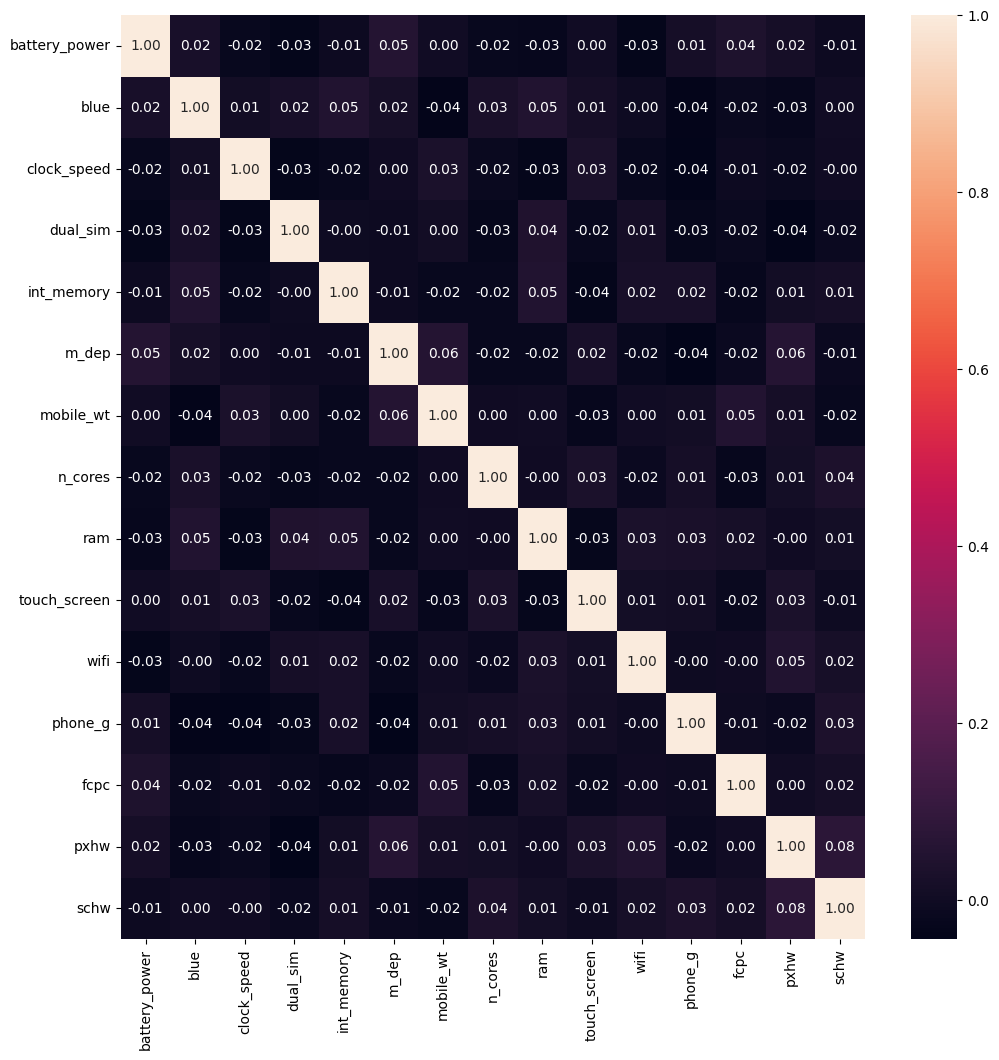

In [15]:
# Check those features collinearity again
redundant = check_collinearity(X_train,0.49)

In [16]:
print(X_train.shape)
print(y_train.shape)

#Do the same for test_dataset
X_test = clean_3g4g(X_test)
X_test=fcpc(X_test)
X_test,y_test = pxhw(X_test,y_test)
X_test,y_test = schw(X_test,y_test)

print(X_test.shape)
print(y_test.shape)

(1366, 15)
(1366,)
(453, 15)
(453,)


# Steps
1. separate df into X and y. (done)
2. separate df into train and test set (done)
3. separate X categorical and X numerical
4. detect outlier
5. Standardization
6. Feature Selection

In [17]:
X_train_cate, X_train_nume = clean.Separate_features(X_train)
X_test_cate, X_test_nume = clean.Separate_features(X_test)


Index(['blue', 'dual_sim', 'n_cores', 'touch_screen', 'wifi', 'phone_g'], dtype='object')
Index(['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt',
       'ram', 'fcpc', 'pxhw', 'schw'],
      dtype='object')
Index(['blue', 'dual_sim', 'n_cores', 'touch_screen', 'wifi', 'phone_g'], dtype='object')
Index(['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt',
       'ram', 'fcpc', 'pxhw', 'schw'],
      dtype='object')


In [18]:
outliers_train = clean.detect_outliers(X_train_nume)
outliers_test = clean.detect_outliers(X_test_nume)
print(outliers_train)
print(outliers_test)

[1827, 483, 1695, 148, 1528, 1163, 961, 520, 1473, 219, 260, 1017, 894, 1771, 1734, 292, 274, 1615, 770, 1420, 353, 393, 94, 527, 508, 369, 1632, 1812, 220, 1060, 1972, 1254]
[873, 305, 1397, 988, 1807, 1645]


In [19]:
# Since theres just a little outliers, we just remove them
X_train_cate = X_train_cate.drop(outliers_train)
X_train_nume = X_train_nume.drop(outliers_train)
y_train = y_train.drop(outliers_train)

X_test_cate = X_test_cate.drop(outliers_test)
X_test_nume = X_test_nume.drop(outliers_test)
y_test = y_test.drop(outliers_test)

print(X_train_cate.shape)
print(X_train_nume.shape)

print(X_test_cate.shape)
print(X_test_nume.shape)

(1334, 6)
(1334, 9)
(447, 6)
(447, 9)


In [20]:
X_train_nume,X_test_nume = clean.Standardization(X_train_nume,X_test_nume)

In [21]:
X_train = clean.concat(X_train_cate,X_train_nume)
X_test = clean.concat(X_test_cate,X_test_nume)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1334, 15)
(1334,)
(447, 15)
(447,)


In [22]:
X_train.head()

,blue,dual_sim,n_cores,touch_screen,wifi,phone_g,battery_power,clock_speed,int_memory,m_dep,mobile_wt,ram,fcpc,pxhw,schw
0,0,1,1,0,0,1,-0.737059,-0.141177,0.540581,-0.989875,0.318786,-1.427660,0.518727,-1.005055,0.187311
1,1,0,2,1,0,2,1.712620,1.445533,1.751185,1.417901,0.148511,-0.366547,0.411973,0.710183,-0.994784
2,1,0,8,1,1,2,-1.356258,0.835260,0.925773,-1.333843,-0.021763,1.320705,-1.402852,-0.421989,-1.051074
3,0,0,5,0,0,2,-0.151757,0.591151,-0.394886,1.073933,1.652602,0.330702,-0.762326,-1.025558,-0.291156
4,0,1,2,0,0,2,1.615446,1.567587,-0.780078,-0.989875,-0.135279,-1.213406,0.518727,-0.762902,-0.755551


In [23]:
X_test.head()

,blue,dual_sim,n_cores,touch_screen,wifi,phone_g,battery_power,clock_speed,int_memory,m_dep,mobile_wt,ram,fcpc,pxhw,schw
0,0,0,3,1,1,2,-1.555125,-1.239669,-1.165271,-0.645907,-0.248795,-1.398108,-1.402852,-0.396621,0.060658
1,1,1,2,1,0,0,0.408686,-0.019122,0.650636,0.042029,1.141779,1.256059,-0.335308,-1.053970,1.496058
2,0,0,6,1,0,0,1.244831,0.102932,0.485553,-0.301939,0.687714,0.169088,1.052499,0.025106,-1.008857
3,0,1,7,0,1,0,0.282134,1.201424,-0.670023,0.385997,-0.135279,1.178484,-1.509606,2.087203,-1.135510
4,1,1,8,0,0,1,-0.106560,-1.239669,-0.614996,-0.301939,0.574197,0.213417,-0.869080,-1.066334,0.707995


## Feature Selection: 
1. Start with simpler method:Variance Threshold
    - obj: to determine feataures with low variance (hold lesser information)
    - finding: the first 6 columns are categorical features, which mean other numerical features have variance of 1 (contain information).

2. Check the importance between features with target variable.
    - obj: to determine the importance of the feature to the target variable
    - finding: except for 'blue' column, other have low feature importances.

3. Check the collinearity between features. (done earlier)
    - obj: remove some columns if high collinearity detected
    - finding: redundant features (4) is preprocessed.

4. for those columns which has low feature importances, feature extraction will be performed (PCA - to capture maximum variance and reduce the data dimensionality)

In [24]:
# Variance Threshold
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold().fit(X_train)
print(vt.get_feature_names_out())
print(vt.variances_)


['blue' 'dual_sim' 'n_cores' 'touch_screen' 'wifi' 'phone_g'
 'battery_power' 'clock_speed' 'int_memory' 'm_dep' 'mobile_wt' 'ram'
 'fcpc' 'pxhw' 'schw']
[0.24999944 0.24999944 5.19333868 0.24999101 0.24979714 0.68618914
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]


In [25]:
# Feature importance using Tree
from sklearn.ensemble import ExtraTreesClassifier

fs_clf = ExtraTreesClassifier(criterion='gini',n_jobs=-1).fit(X_train,y_train)
fi = sorted(fs_clf.feature_importances_,reverse=True)
print(fi)

[0.40043876379202703, 0.07097437477365194, 0.06918988220604437, 0.0506603896002615, 0.05040929608517406, 0.049574163506199705, 0.04935359049506277, 0.04775182424922655, 0.04769950656676641, 0.04495417425162145, 0.031196548428058933, 0.02437799546257491, 0.024083248533498455, 0.02091945137707204, 0.018416790672759843]


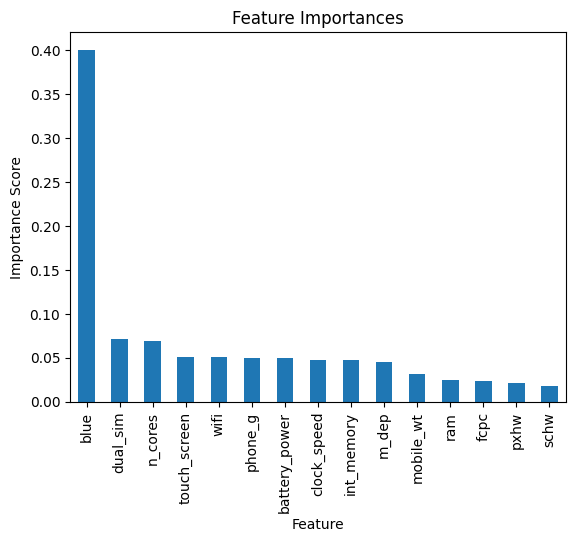

In [26]:
fi = pd.Series(fi,index = [column for column in X_train.columns])
#fi.head()
fig, ax = plt.subplots()
fi.plot.bar(ax=ax)
ax.set_title('Feature Importances')
ax.set_ylabel('Importance Score')
ax.set_xlabel('Feature')

plt.show()

In [27]:
print(X_train.columns)
print(X_train.shape)

Index(['blue', 'dual_sim', 'n_cores', 'touch_screen', 'wifi', 'phone_g',
       'battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt',
       'ram', 'fcpc', 'pxhw', 'schw'],
      dtype='object')
(1334, 15)


In [28]:
X_train_cate = X_train[['blue', 'dual_sim', 'n_cores', 'touch_screen', 'wifi', 'phone_g']]

X_train_nume = X_train[['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt',
       'ram', 'fcpc', 'pxhw', 'schw']]

print(X_train_cate.columns)
print(X_train_nume.columns)

Index(['blue', 'dual_sim', 'n_cores', 'touch_screen', 'wifi', 'phone_g'], dtype='object')
Index(['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt',
       'ram', 'fcpc', 'pxhw', 'schw'],
      dtype='object')


## Feature Extraction for those numerical columns which have low feature importance
1. pca 
    - obj: to perform dimensionality reduction and also capturing the maximum variances.
    - finding: from the graph plotted below, n = 7 is reasonable choice (high increase in performance, and small performance changes afterwards)
    - conclu: however, pca is not require for this dataset as its only moderate dimensionality and huge information loss during this process. (performance worst than base model by alot!)

[0.30957449804285997, 0.383075666694827, 0.4332713806989384, 0.4692461490805666, 0.4767283376981781, 0.4767367857846865, 0.6784376672017122, 0.6866717355185716]


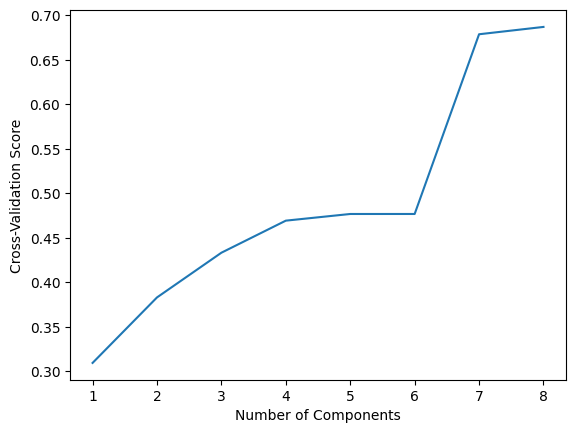

In [29]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = []
for i in range(1,len(X_train_nume.columns)):
    X_pca = PCA(n_components=i).fit_transform(X_train_nume)
    X_pca = pd.DataFrame(X_pca,columns=[f'PC_{j}' for j in range(1, i + 1)])

    X_clean = clean.concat(X_train_cate,X_pca)
    
    valid_clf = LogisticRegression()
    score = np.mean(cross_val_score(valid_clf,X_clean,y_train,cv=5,n_jobs=-1))
    scores.append(score)

print(scores)
plt.plot(range(1,len(X_train_nume.columns)), scores)
plt.xlabel('Number of Components')
plt.ylabel('Cross-Validation Score')
plt.show()

## Model Fine Tuning For 
1. lr (gridsearch_cv)
    - findings: 
        - before data preprocess and fine tuning => 97%
        - after => 92.84%
2. nn (keras tuner)
    - findings: 
        - before => train_acc=100%, valid_acc=88%, test_acc=93.51%
        - after => train_acc=86.62%, valid_acc=88.01%, test_acc=90.60%


In [30]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Param_Grid = {
    'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
    'max_iter': [100,150,200,250,300],
    'C': [1.0,0.1,0.01,0.001]
}

LR = LogisticRegression()
clf = GridSearchCV(estimator=LR,param_grid=Param_Grid,
                   n_jobs=-1,cv=10,
                   scoring='accuracy').fit(X_train,y_train)



In [31]:
print(clf.best_params_)
estimator = clf.best_estimator_
print(estimator)

{'C': 1.0, 'max_iter': 100, 'solver': 'sag'}
LogisticRegression(solver='sag')


In [32]:
y_pred = estimator.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

acc = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print('Accuracy Score: ', acc)
print(cr)
print(cm)

Accuracy Score:  0.9351230425055929
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       106
           1       0.91      0.93      0.92       109
           2       0.94      0.89      0.91       114
           3       0.94      0.97      0.95       118

    accuracy                           0.94       447
   macro avg       0.94      0.94      0.93       447
weighted avg       0.94      0.94      0.93       447

[[102   4   0   0]
 [  6 101   2   0]
 [  0   6 101   7]
 [  0   0   4 114]]


In [33]:
# Further split the training set for validation set
X_train,X_valid,y_train,y_valid=clean.Split(X_train,y_train,test_size=0.2)

In [34]:
## nn
import keras
import keras_tuner as kt
from keras import layers

input_shape = (X_train.shape[1],)

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.Input(shape=input_shape))
    # Define number of hidden layers
    num_hidden_layers = hp.Int('num_hidden_layers',
                               min_value=1,max_value=10,default=4)
    
    for i in range(num_hidden_layers):
        # Define number of neurons for each hidden layer
        num_neurons = hp.Int(f'units_{i}',
                             min_value=16,max_value=256,
                             step=16 ,default=32)
        dropout_rate = hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, default=0.2)

        model.add(layers.Dense(units=num_neurons,activation='relu'))
        # A hyperparamter for whether to use dropout layer.
        if hp.Boolean("dropout"):
            model.add(layers.Dropout(rate=dropout_rate))

    model.add(layers.Dense(units=4,activation='softmax'))

    #define optimizer
    optimizer_choice = hp.Choice('optimizer',['sgd','rmsprop','adam','adagrad'])

    model.compile(optimizer=optimizer_choice,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
                  
    print('Model Architecture:')
    model.summary()

    return model

tuner = kt.GridSearch(
    hypermodel = build_model,
    objective = 'val_accuracy',
    overwrite=True,
    max_trials=100
)

tuner.search(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))

Trial 100 Complete [00h 00m 02s]
val_accuracy: 0.3745318353176117

Best val_accuracy So Far: 0.9026217460632324
Total elapsed time: 00h 03m 46s


In [35]:
best_model = tuner.get_best_models()[0]
print(best_model)
y_pred = np.argmax(best_model.predict(X_test),axis=1)

acc = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print('Accuracy Score: ', acc)
print(cr)
print(cm)

Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,220 (12.58 KB)

 Trainable params: 3,220 (12.58 KB)

 Non-trainable params: 0 (0.00 B)

<Sequential name=sequential, built=True>
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy Score:  0.912751677852349
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       106
           1       0.94      0.86      0.90       109
           2       0.93      0.87      0.90       114
           3       0.91      0.94      0.93       118

    accuracy                           0.91       447
   macro avg       0.91      0.91      0.91       447
weighted avg       0.91      0.91      0.91       447

[[104   2   0   0]
 [ 14  94   1   0]
 [  0   4  99  11]
 [  0   0   7 111]]


c:\Users\User\Desktop\Algorithms\DataScience\well_structured\mobile_dataset_p\Mobile\lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [36]:
best_hp = tuner.get_best_hyperparameters()[0]
print(best_hp)
tuned_model = tuner.hypermodel.build(best_hp)

#best_model.summary()
from keras.callbacks import EarlyStopping

callbacks = EarlyStopping(
    monitor="val_loss",
    min_delta=0.1,
    patience=2,
    mode="auto",
    restore_best_weights=True,
)

history = tuned_model.fit(
    X_train,y_train,epochs=100,validation_data=(X_valid,y_valid),
    callbacks=callbacks
)


Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,220 (12.58 KB)

 Trainable params: 3,220 (12.58 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2662 - loss: 1.4642 - val_accuracy: 0.2996 - val_loss: 1.3449
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2945 - loss: 1.3162 - val_accuracy: 0.3895 - val_loss: 1.2326
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4703 - loss: 1.1833 - val_accuracy: 0.5843 - val_loss: 1.0987
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5864 - loss: 1.0553 - val_accuracy: 0.7228 - val_loss: 0.9296
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7169 - loss: 0.8968 - val_accuracy: 0.8277 - val_loss: 0.6487
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8181 - loss: 0.5947 - val_accuracy: 0.8464 - val_loss: 0.4291
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8494 - loss: 0.4062 - val_accuracy: 0.8502 - val_loss: 0.3565
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8965 - loss: 0.3052 - val_accuracy: 0.8914 - v

In [37]:
y_pred = np.argmax(tuned_model.predict(X_test),axis=1)

acc = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy Score: ', acc)
print(cr)
print(cm)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy Score:  0.9060402684563759
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       106
           1       0.89      0.94      0.91       109
           2       0.91      0.83      0.87       114
           3       0.89      0.93      0.91       118

    accuracy                           0.91       447
   macro avg       0.91      0.91      0.91       447
weighted avg       0.91      0.91      0.91       447

[[ 98   8   0   0]
 [  6 102   1   0]
 [  0   5  95  14]
 [  0   0   8 110]]


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


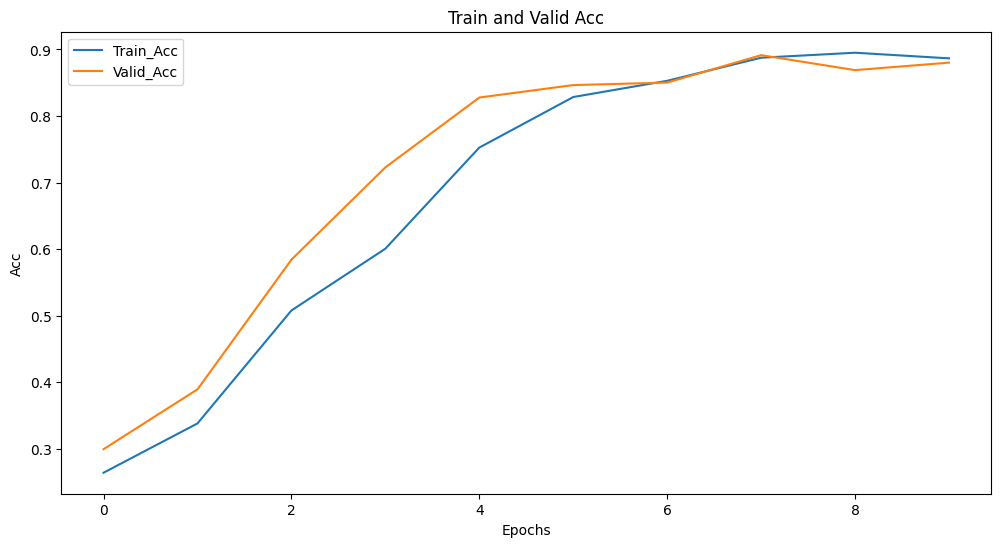

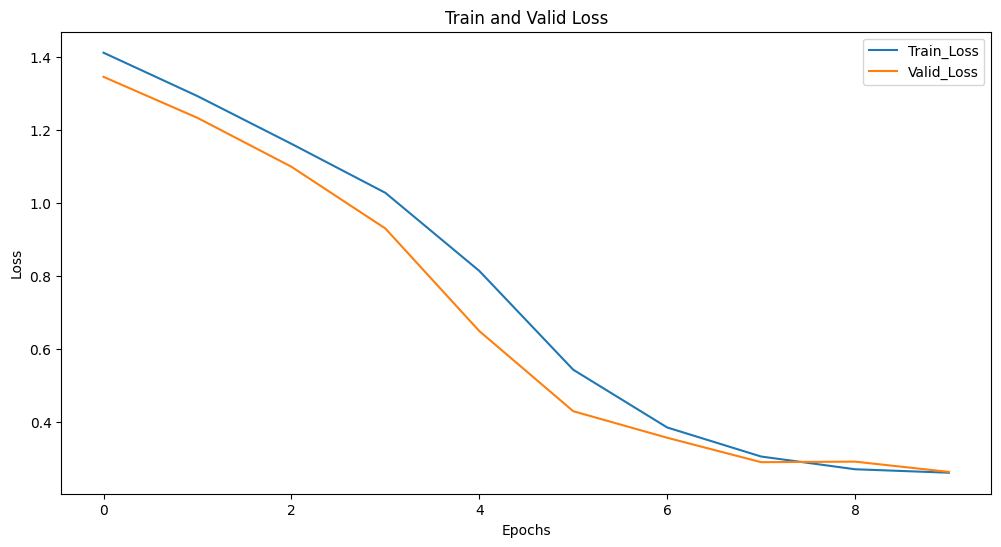

In [38]:
import matplotlib.pyplot as plt

def plot_result(train_metric,valid_metric,label1,label2,title,ylabel):

    plt.figure(figsize=(12, 6))
    plt.plot(train_metric, label=label1)
    plt.plot(valid_metric, label=label2)
    
    plt.title(title)
    
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)

    plt.legend()

print(history.history.keys())
Train_Acc,Train_Loss,Valid_Acc,Valid_Loss = history.history.values()
plot_result(Train_Acc,Valid_Acc,'Train_Acc','Valid_Acc','Train and Valid Acc','Acc')
plot_result(Train_Loss,Valid_Loss,'Train_Loss','Valid_Loss','Train and Valid Loss','Loss')

## Summary
- Both model performed well after fine tuning, overfitting issue is reduced as the the model now is more generalized although the accuracy dropped.
- Among these 2 models, nn would be slightly better to deploy. (due to more stable performance metrics)

In [39]:
## Save the model, scaler
## Deploy
import pickle
import tensorflow as tf

data = {'scaler':clean.scaler}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

tuned_model.save('my_model.keras')


In [40]:

loaded_model = tf.keras.models.load_model('my_model.keras')
loaded_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,662 (37.75 KB)

 Trainable params: 3,220 (12.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,442 (25.17 KB)

In [41]:
X_test.head()
X_test.shape

(447, 15)

In [42]:
y_test.iloc[0] # Retrieves the first value from y



0

In [48]:
single_row = X_test[0:1]
single_row

,blue,dual_sim,n_cores,touch_screen,wifi,phone_g,battery_power,clock_speed,int_memory,m_dep,mobile_wt,ram,fcpc,pxhw,schw
0,0,0,3,1,1,2,-1.555125,-1.239669,-1.165271,-0.645907,-0.248795,-1.398108,-1.402852,-0.396621,0.060658


In [43]:
single_row = X_test[0:1]
y_new = np.argmax(loaded_model.predict(single_row),axis=1)
print(y_new)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[0]


In [45]:
random_array = np.random.rand(1, 15)
print(random_array)
y_new = np.argmax(loaded_model.predict(random_array),axis=1)
print(y_new)

[[0.16819416 0.15047627 0.70988753 0.13319141 0.53704769 0.2532404
  0.78824048 0.07133565 0.0029158  0.16815133 0.50819569 0.67016396
  0.70530414 0.97731533 0.27113097]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[3]
